### 自動化更新

Q：列舉一個是需要用自動化更新的機制來達成的爬蟲應用。

Ans：<br>
Yahoo首頁上的最新新聞

自動化更新：<br>
1.使用time裡的sleep (如果作業不複雜的情況下，方便使用) <br>
2.使用threading 的 Timer <br>
3.使用schedule <br>

import schedule  <br>
import time  <br>
  
def job():  <br>
    print("I'm working...") <br>  
  
schedule.every(10).minutes.do(job)   #每隔10分鐘執行一次任務 <br>
schedule.every().hour.do(job)   #每隔一小時執行一次任務 <br>
schedule.every().day.at("10:30").do(job)   #每天10:30執行一次任務 <br>
schedule.every().monday.do(job)   #每週一的這個時候執行一次任務 <br>
schedule.every().wednesday.at("13:15").do(job)   #每週三13:15執行一次任務 <br>
<br>
while True:<br>  
    schedule.run_pending()<br>  
    time.sleep(1)  <br>

### 1.加上sleep

In [3]:
import time

def job01():
    print('hello world',time.ctime(time.time()))

while True:
    job01()
    time.sleep(5)

hello world Tue Oct 20 02:38:22 2020
hello world Tue Oct 20 02:38:27 2020
hello world Tue Oct 20 02:38:32 2020
hello world Tue Oct 20 02:38:37 2020
hello world Tue Oct 20 02:38:42 2020


KeyboardInterrupt: 

### 2.threading 的 Timer

In [13]:
from threading import Timer
import time

def job02(count):
    count +=1
    if count >5:
        return
    print('Hello world ',count,' ',time.ctime(time.time()))
    t = Timer(2,job02,(count,))
    t.start()    

count =0
job02(count)

Hello world  1   Tue Oct 20 03:17:47 2020
Hello world  2   Tue Oct 20 03:17:49 2020
Hello world  3   Tue Oct 20 03:17:51 2020
Hello world  4   Tue Oct 20 03:17:53 2020
Hello world  5   Tue Oct 20 03:17:55 2020


In [14]:
# 若是t = Timer(2,job02(count)) 會同時執行五條線
from threading import Timer
import time

def job02(count):
    count +=1
    if count >5:
        return
    print('Hello world ',count,' ',time.ctime(time.time()))
    t = Timer(2,job02(count))
    t.start()    

count =0
job02(count)

Hello world  1   Tue Oct 20 03:19:01 2020
Hello world  2   Tue Oct 20 03:19:01 2020
Hello world  3   Tue Oct 20 03:19:01 2020
Hello world  4   Tue Oct 20 03:19:01 2020
Hello world  5   Tue Oct 20 03:19:01 2020


Exception in thread Thread-28:
Traceback (most recent call last):
  File "C:\Users\Happy sunday\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "C:\Users\Happy sunday\Anaconda3\lib\threading.py", line 1158, in run
    self.function(*self.args, **self.kwargs)
TypeError: 'NoneType' object is not callable
Exception in thread Thread-24:
Traceback (most recent call last):
  File "C:\Users\Happy sunday\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "C:\Users\Happy sunday\Anaconda3\lib\threading.py", line 1158, in run
    self.function(*self.args, **self.kwargs)
TypeError: 'NoneType' object is not callable
Exception in thread Thread-27:
Traceback (most recent call last):
  File "C:\Users\Happy sunday\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "C:\Users\Happy sunday\Anaconda3\lib\threading.py", line 1158, in run
    self.function(*self.args, **self.kwargs)
TypeError: 'NoneType' object is no

In [17]:
import time
from threading import Timer
def print_time( enter_time ):
    print("now is", time.time() , "enter_the_box_time is", enter_time)
    print(time.time())

Timer(5,  print_time, ( time.time(), )).start()
Timer(10, print_time, ( time.time(), )).start()


now is 1603135587.418723 enter_the_box_time is 1603135582.4094367
1603135587.4237235
now is 1603135592.421009 enter_the_box_time is 1603135582.4104366
1603135592.4230094


In [19]:
import time
from threading import Timer
def print_time( enter_time ):
    print("now is", time.time() , "enter_the_box_time is", enter_time)
    print(time.time())

Timer(5,  print_time, ( time.time(), )).start()
Timer(5, print_time, ( time.time(), )).start()
#兩條線同時執行

now isnow is 1603135687.3074362 enter_the_box_time is 1603135682.29915
1603135687.311437
 1603135687.302436 enter_the_box_time is 1603135682.30015
1603135687.3124368


### 3.使用schedule

如果你去掉while True这个死循环的话，schedule.run_pending()是没有办法持续运行的，<br>
那么schedule.run_pending()是个什么东西呢——<br>
schedule其实就只是个定时器。在while True死循环中，schedule.run_pending()是保持schedule一直运行，<br>
去查询上面那一堆的任务，在任务中，就可以设置不同的时间去运行。跟linux中设置crontab定时任务是类似的。<br>
所以，schedule有一定的局限性，所以只能用来执行一些小型的定时任务，它的局限性在哪呢——<br>
1.需要定时运行的函数job不应当是死循环类型的，也就是说，这个线程应该有一个执行完毕的出口。<br>
一是因为线程万一僵死，会是非常棘手的问题；二是下一次定时任务还会开启一个新的线程，执行次数多了就会演变成灾难。<br>
2.如果schedule的时间间隔设置得比job执行的时间短，一样会线程堆积形成灾难，<br>
也就是说，我job的执行时间是1个小时，但是我定时任务设置的是5分钟一次，那就会一直堆积线程。<br>
<br>
https://blog.csdn.net/liao392781/article/details/80521194

In [ ]:
import schedule
import time

def job03():
    print(time.ctime(time.time()))

schedule.every(10).seconds.do(job03)

while True:
    schedule.run_pending()

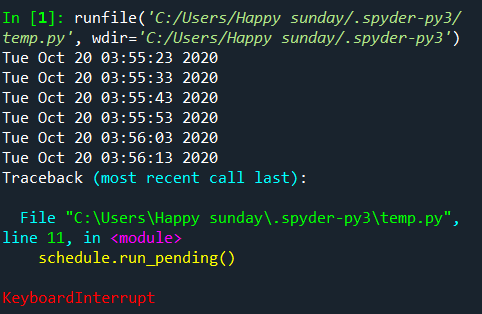

下面為每隔10秒定期執行job1和job2，但可以由印出的時間知，<br>
兩個job1的時間差為12秒，因為job1中有休眠2秒，job1完成後執行job2，<br>
job2完成後再等10秒再執行job1<br>
job1→job2→10秒→job1→job2→....

In [7]:
import datetime
import schedule
import time
 
def job1():
    print("I'm working for job1")
    time.sleep(2)
    print("job1:", datetime.datetime.now())

def job2():
    print("I'm working for job2")
    time.sleep(2)
    print("job2:", datetime.datetime.now())

def run():
    schedule.every(10).seconds.do(job1())
    schedule.every(10).seconds.do(job2())

while True:
    schedule.run_pending()
    time.sleep(1)

I'm working for job1
job1: 2020-10-18 09:30:22.811254
I'm working for job2
job2: 2020-10-18 09:30:24.811369
I'm working for job1
job1: 2020-10-18 09:30:34.811941
I'm working for job2
job2: 2020-10-18 09:30:37.812112
I'm working for job1
job1: 2020-10-18 09:30:46.812627
I'm working for job2
job2: 2020-10-18 09:30:49.813799
I'm working for job1
job1: 2020-10-18 09:30:58.814314
I'm working for job2
job2: 2020-10-18 09:31:01.814485


KeyboardInterrupt: 

若是要job1執行完畢等待10秒，再次執行job1(不等job2)，可利用線程。

In [9]:
import datetime
import schedule
import threading
import time
 
def job1():
    print("I'm working for job1")
    time.sleep(2)
    print("job1:", datetime.datetime.now())

def job2():
    print("I'm working for job2")
    time.sleep(2)
    print("job2:", datetime.datetime.now())

def job1_task():
    threading.Thread(target=job1).start()

def job2_task():
    threading.Thread(target=job2).start()

def run():
    schedule.every(10).seconds.do(job1_task)
    schedule.every(10).seconds.do(job2_task)

while True:
    schedule.run_pending()
    time.sleep(1)

I'm working for job1
job1: 2020-10-18 09:39:07.244250
I'm working for job2
job2: 2020-10-18 09:39:09.245365
I'm working for job1
job1: 2020-10-18 09:39:19.245937
I'm working for job2
job2: 2020-10-18 09:39:22.246108
I'm working for job1
job1: 2020-10-18 09:39:31.246623
I'm working for job2
job2: 2020-10-18 09:39:34.246795
I'm working for job1
job1: 2020-10-18 09:39:43.247309
I'm working for job2
job2: 2020-10-18 09:39:46.247481


KeyboardInterrupt: 